# Working with Time Series Data

From here: https://dmbee.github.io/seglearn/auto_examples/plot_watchdata.html

## Overview

This example shows how to load the included **smartwatch inertial sensor dataset**, and create time series data objects compatible with the `seglearn` pipeline.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from seglearn.base import TS_Data
from seglearn.datasets import load_watch
from seglearn.util import check_ts_data, ts_stats

In [3]:
data = load_watch()

In [4]:
data.keys()

dict_keys(['X', 'y_labels', 'y', 'subject', 'side', 'X_labels'])

In [5]:
y = data['y']
Xt = data['X']
fs = 50  # sampling frequency

In [8]:
print(type(Xt))
print(len(Xt))
print(Xt[0].shape)
print(Xt[2].shape)
print(Xt[3].shape)

<class 'list'>
140
(1333, 6)
(2197, 6)
(1597, 6)


In [12]:
print(type(y))
print(y.shape)
print(y[0:3])
print(np.unique(y))

<class 'numpy.ndarray'>
(140,)
[0 2 2]
[0 1 2 3 4 5 6]


In [ ]:
# create time series data object with **no contextual variables**
check_ts_data(Xt)

In [16]:
# create time series data object with 2 contextual variables
Xs = np.column_stack([data['side'], data['subject']])
print(Xs.shape)

(140, 2)


In [17]:
X = TS_Data(Xt, Xs)  # <-- NOTE.
check_ts_data(X)

In [18]:
# recover time series and contextual variables
Xt = X.ts_data
Xs = X.context_data

In [19]:
print(type(Xt))
print(len(Xt))
print(Xt[0].shape)
print(Xt[2].shape)
print(Xt[3].shape)

<class 'numpy.ndarray'>
140
(1333, 6)
(2197, 6)
(1597, 6)


In [21]:
# generate some statistics from the time series data
results = ts_stats(X, y, fs=fs, class_labels=data['y_labels'])
results

{'total': {'n_series': 140,
  'n_classes': 7,
  'n_TS_vars': 6,
  'n_context_vars': 2,
  'Total_Time': 4882.04,
  'Series_Time_Mean': 34.87171428571428,
  'Series_Time_Std': 8.757850351285423,
  'Series_Time_Range': (18.94, 52.36)},
 'by_class': {'Class_labels': ['PEN', 'ABD', 'FEL', 'IR', 'ER', 'TRAP', 'ROW'],
  'n_series': array([20, 20, 20, 20, 20, 20, 20]),
  'Total_Time': array([532.44, 798.1 , 809.96, 747.9 , 752.08, 611.56, 630.  ]),
  'Series_Time_Mean': array([26.622, 39.905, 40.498, 37.395, 37.604, 30.578, 31.5  ]),
  'Series_Time_Std': array([2.72084472, 8.0555543 , 8.77209872, 9.08521189, 7.98387775,
         6.09925209, 5.95709997]),
  'Series_Time_Min': array([21.28, 22.48, 22.3 , 19.4 , 21.3 , 19.26, 18.94]),
  'Series_Time_Max': array([31.1 , 49.1 , 50.84, 52.36, 49.24, 45.12, 38.66])}}

In [22]:
print("DATA STATS - AGGREGATED")
print(results['total'])
print("")
print("DATA STATS - BY CLASS")
print(pd.DataFrame(results['by_class']))

DATA STATS - AGGREGATED
{'n_series': 140, 'n_classes': 7, 'n_TS_vars': 6, 'n_context_vars': 2, 'Total_Time': 4882.04, 'Series_Time_Mean': 34.87171428571428, 'Series_Time_Std': 8.757850351285423, 'Series_Time_Range': (18.94, 52.36)}

DATA STATS - BY CLASS
  Class_labels  n_series  Total_Time  Series_Time_Mean  Series_Time_Std  \
0          PEN        20      532.44            26.622         2.720845   
1          ABD        20      798.10            39.905         8.055554   
2          FEL        20      809.96            40.498         8.772099   
3           IR        20      747.90            37.395         9.085212   
4           ER        20      752.08            37.604         7.983878   
5         TRAP        20      611.56            30.578         6.099252   
6          ROW        20      630.00            31.500         5.957100   

   Series_Time_Min  Series_Time_Max  
0            21.28            31.10  
1            22.48            49.10  
2            22.30            

<br/>

**Note on `ts_stats()`:**

The [docs](https://dmbee.github.io/seglearn/util.html#seglearn.util.ts_stats) aren't descriptive on what exactly these stats are, so see [source](https://dmbee.github.io/seglearn/_modules/seglearn/util.html#ts_stats).

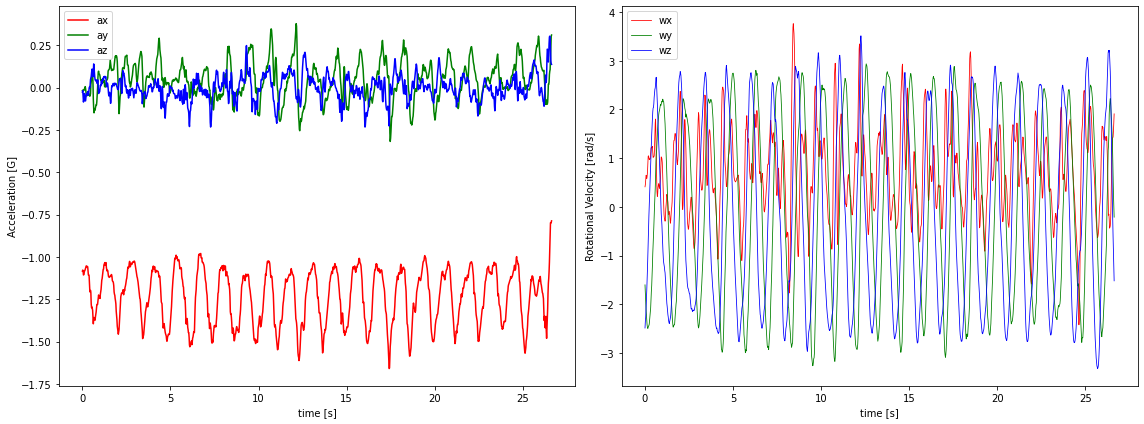

In [34]:
# plot an instance from the data set
# this plot shows 6-axis inertial sensor data recorded by someone doing shoulder pendulum exercise
Xt0 = Xt[0]
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
t = np.arange(len(Xt0)) / fs

axes[0].plot(t, Xt0[:, 0], 'r-')
axes[0].plot(t, Xt0[:, 1], 'g-')
axes[0].plot(t, Xt0[:, 2], 'b-')
axes[0].set_xlabel('time [s]')
axes[0].set_ylabel('Acceleration [G]')
axes[0].legend(data['X_labels'][0:3])

axes[1].plot(t, Xt0[:, 3], 'r-', lw=0.8)
axes[1].plot(t, Xt0[:, 4], 'g-', lw=0.8)
axes[1].plot(t, Xt0[:, 5], 'b-', lw=0.8)
axes[1].set_xlabel('time [s]')
axes[1].set_ylabel('Rotational Velocity [rad/s]')
axes[1].legend(data['X_labels'][3:6])

plt.tight_layout()
plt.show()